In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scikitplot as skplt
import scipy
%matplotlib inline
from scipy.stats import linregress
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from statistics import mean
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import find_peaks
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from imblearn.under_sampling import RandomUnderSampler

In [3]:
ls

1533148882_failures.csv  HackDay4.ipynb           Untitled.ipynb


In [4]:
df = pd.read_csv("1533148882_failures.csv")

In [5]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
abs(df.corr()['failure']).sort_values(ascending = False)

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute3    0.000948
attribute6    0.000550
Name: failure, dtype: float64

In [8]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [10]:
df[df['failure'] == 1].shape

(106, 12)

In [11]:
def cutofflesser(df_in, elem, cutoff):
    
    df_out = df_in[df_in[elem]>cutoff]
    NewTrainingdatasize = df_out.shape[0]
    
    return df_out, NewTrainingdatasize

In [12]:
def cutoffgreater(df_in, elem, cutoff):
    
    df_out = df_in[df_in[elem]<cutoff]
    NewTrainingdatasize = df_out.shape[0]
    
    return df_out, NewTrainingdatasize

In [13]:
def plotattributes(dfin):
    
    dfin = dfin.select_dtypes(exclude=['object'])
    
    for elem in dfin:
        plt.hist(dfin[elem], bins=200)
        plt.yscale('log')

        plt.ylabel('counts', fontsize=13)
        plt.xlabel(str(elem), fontsize=13)
        plt.show()

In [14]:
def GenerateClassPlot(dfin, elem_x, elem_y, model = RandomForestClassifier()):
    
    #model = RandomForestClassifier()
    model.fit(dfin[elem_x].to_frame(), dfin[elem_y])
    x_pred = pd.DataFrame(np.linspace(0, dfin[elem_x].max(), dfin[elem_y].shape[0]))
    y_pred = pd.DataFrame(model.predict(x_pred))
    y_true = dfin[elem_y].to_frame()
    
    
    accuracy = accuracy_score(y_true, y_pred)
    
    #print(x_pred.shape, y_pred.shape, y_true.shape, df[elem_x].to_frame().shape)
    
    fig1 = plt.figure(figsize = (20,5))
    fig1.suptitle(str(elem_x), fontsize=16)
    a = fig1.add_subplot(131)
    a.plot(x_pred, y_pred, 'r')
    a.scatter(dfin[elem_x].to_frame(), y_true)
    a.set_ylabel('Probability of Failure', fontsize=13)
    a.set_xlabel(str(elem_x), fontsize=13)

    b = fig1.add_subplot(132)
    df_1 = dfin[dfin['failure'] == 1]
    df_0 = dfin[dfin['failure'] == 0]
    
    b.hist(df_1[elem_x], bins=50, color = 'orange', zorder = 10)
    b.hist(df_0[elem_x], bins=100, color = 'darkblue',  zorder = 0)
    b.set_yscale('log')
    b.set_ylabel('counts', fontsize=13)
    b.set_xlabel(str(elem_x), fontsize=13)
    
    c = fig1.add_subplot(133)
    fpr, tpr, _ = roc_curve(y_true,  y_pred)
    auc = roc_auc_score(y_true, y_pred)
    c.plot(fpr,tpr,label=str(elem_x)+"\nAUC: "+str(auc)[:6] + "\nAccuracy: "+str(accuracy)[:6])
    c.set_ylabel('True Positive Rate', fontsize=13)
    c.set_xlabel('False Positive Rate', fontsize=13)
    c.legend(loc=4)

In [15]:
def plotfailureattrvstime(dfin, elem_x):
    
    fig1 = plt.figure(figsize = (20,5))
    a = fig1.add_subplot(121)
    b = fig1.add_subplot(122)
    if(elem_x != 'date' and elem_x != 'device'):
        dfin_x = dfin[dfin['failure'] == 1]
        dfin_y = dfin_x.drop(['date'], axis=1)
        dfin_x2 = dfin[dfin['failure'] == 0]
        dfin_y2 = dfin_x2.drop(['date'], axis=1)
        
        a.scatter(dfin_x2['date'], dfin_y2[elem_x], color = 'darkblue', zorder=0)
        a.scatter(dfin_x['date'], dfin_y[elem_x], color = 'orange', zorder=10)
        a.set_ylabel(str(elem_x), fontsize=13)
        a.set_xlabel('Date', fontsize=13)
        a.set_yscale('log')
        a.title.set_text('Time Domain of '+str(elem_x))

        yf = scipy.fftpack.fft(dfin_y[elem])
        N = len(yf)
        T = 1/1000.0
        xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
        
        yf2 = scipy.fftpack.fft(dfin_y2[elem])
        N2 = len(yf)
        T2 = 1/1000.0
        xf2 = np.linspace(0.0, 1.0/(2.0*T), N/2)
        
        b.plot(xf2, 2.0/N * np.abs(yf2[:N//2]), zorder = 0) 
        b.plot(xf, 2.0/N * np.abs(yf[:N//2]), zorder = 0)  
        b.minorticks_on()
        b.set_yscale('log')
        b.set_ylabel('Amplitude')
        b.set_xlabel('Frequency (1/index)')
        b.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        b.title.set_text('FFT of '+str(elem_x))

In [16]:
df1 = df.select_dtypes(exclude=['object'])
df2 = df.select_dtypes(include=['object'])

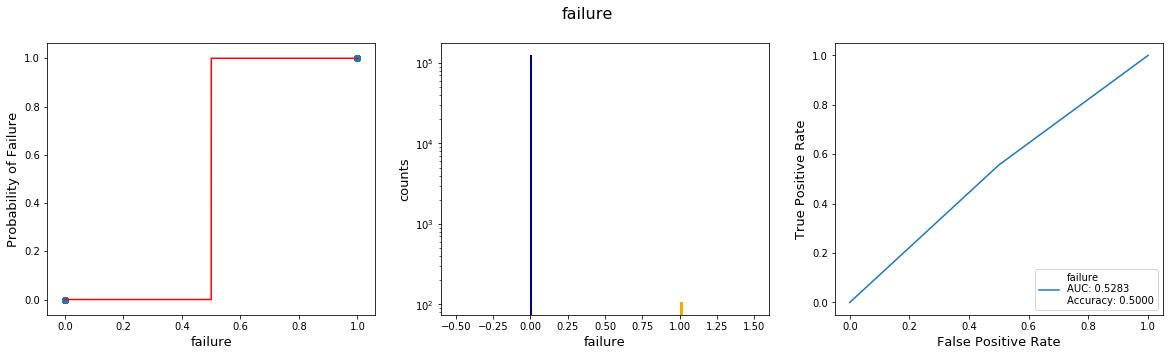

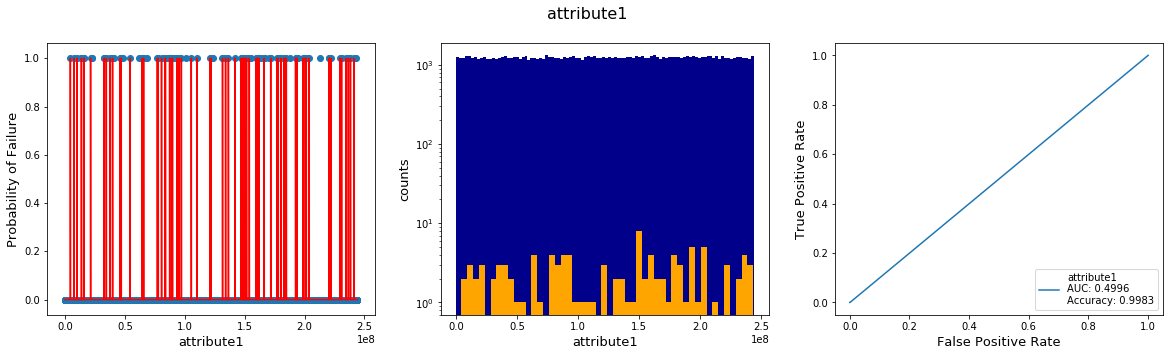

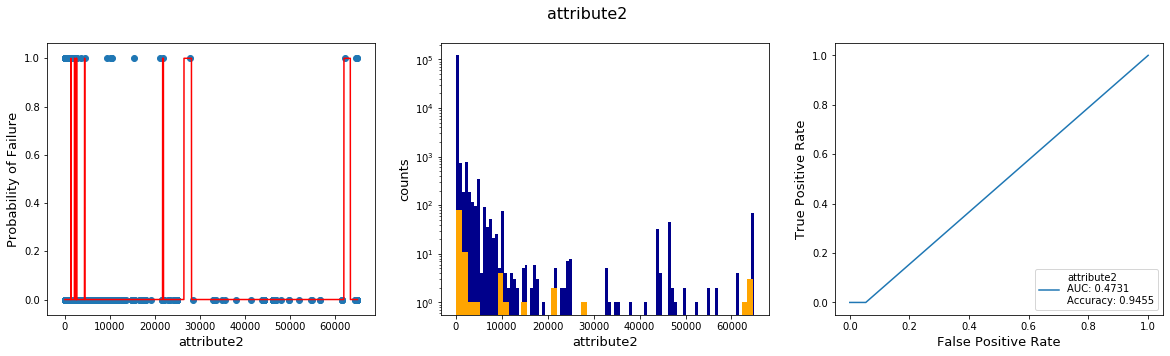

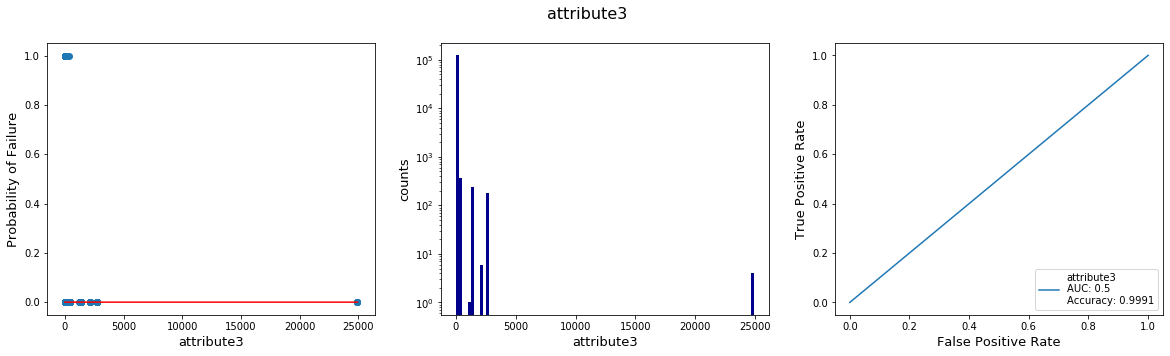

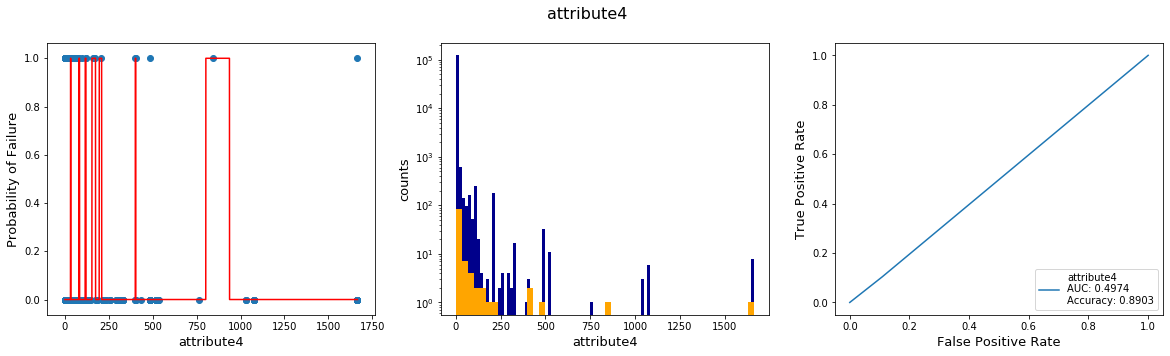

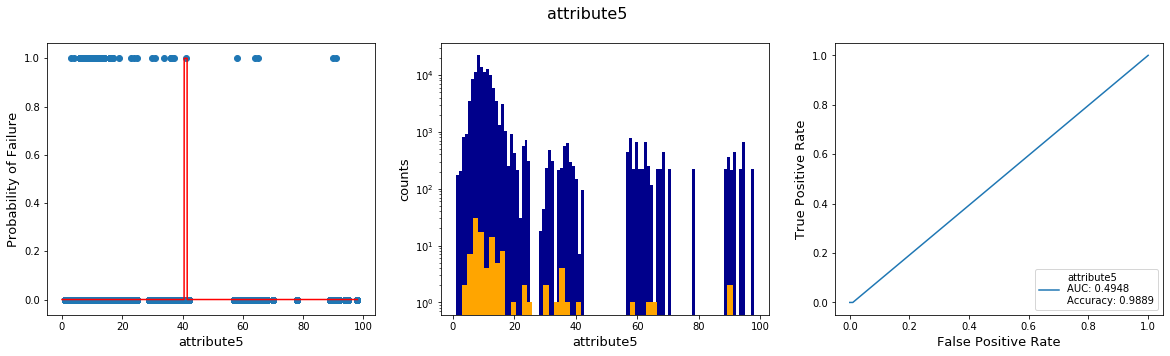

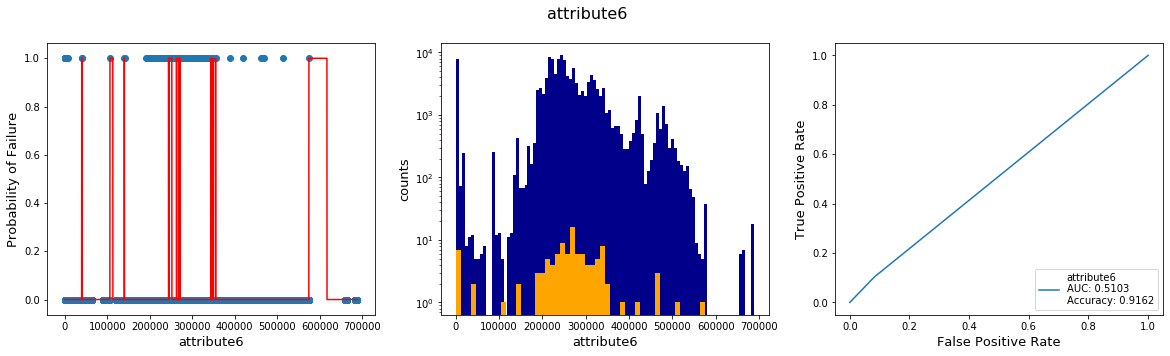

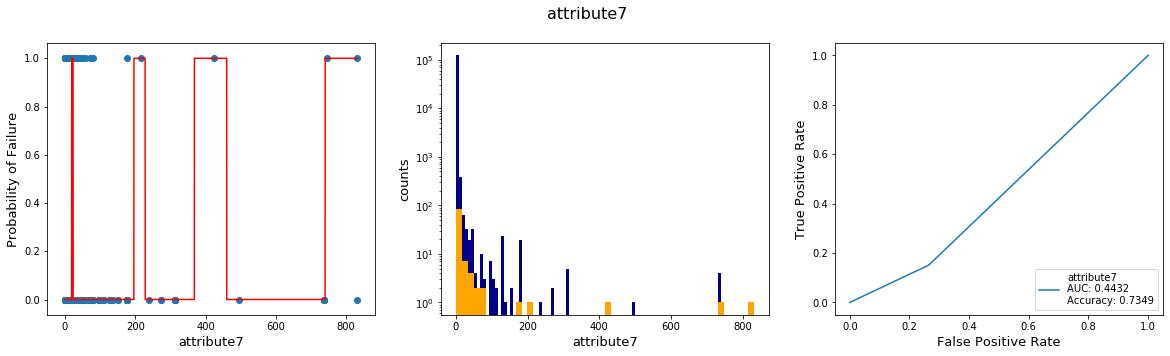

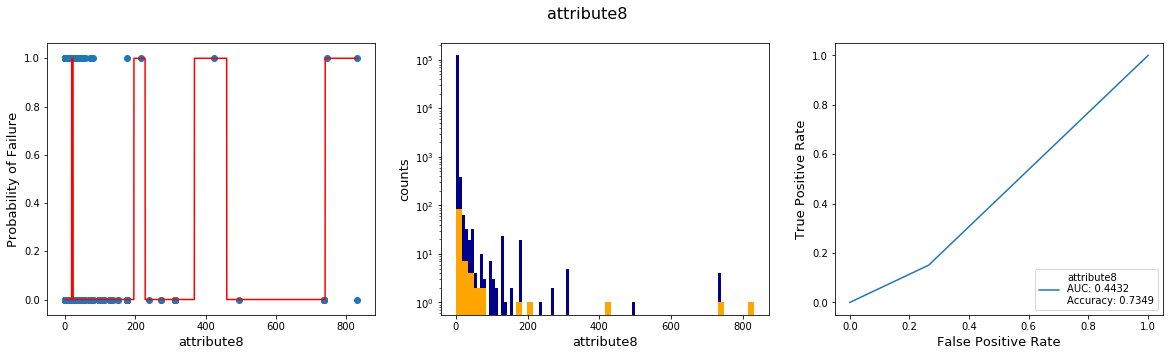

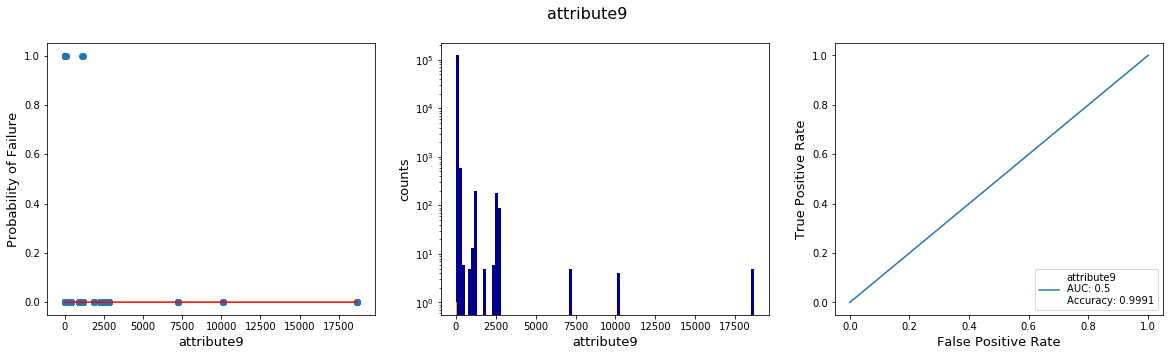

In [17]:
for elem in df1:
    GenerateClassPlot(df1, elem, 'failure', GradientBoostingClassifier())

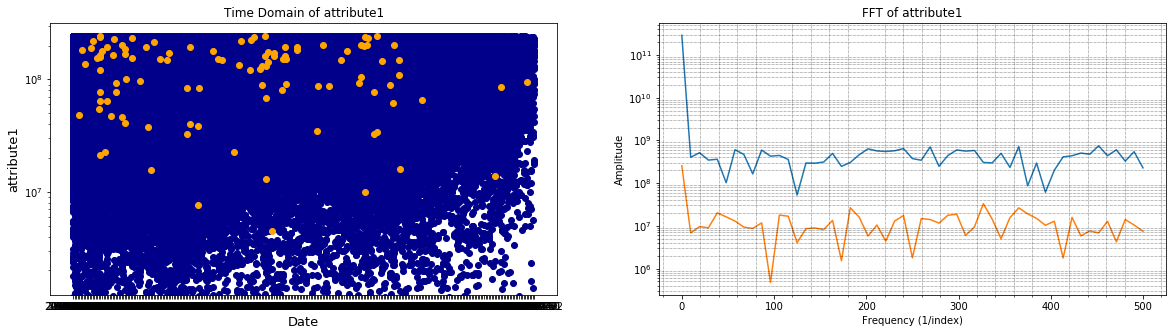

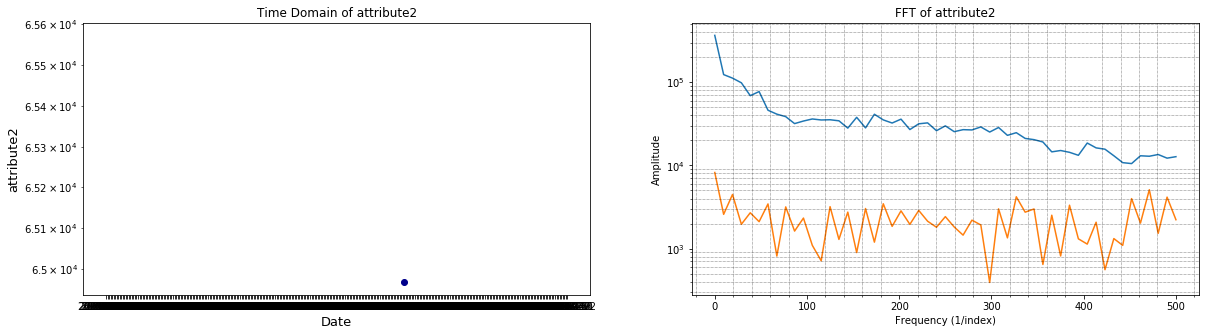

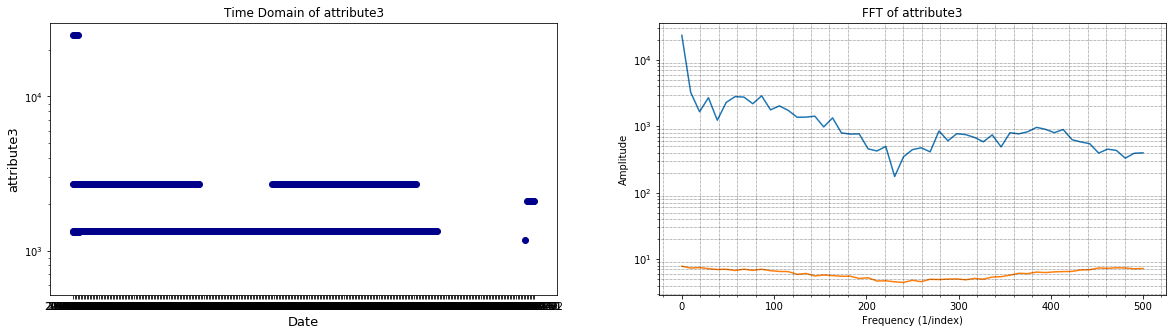

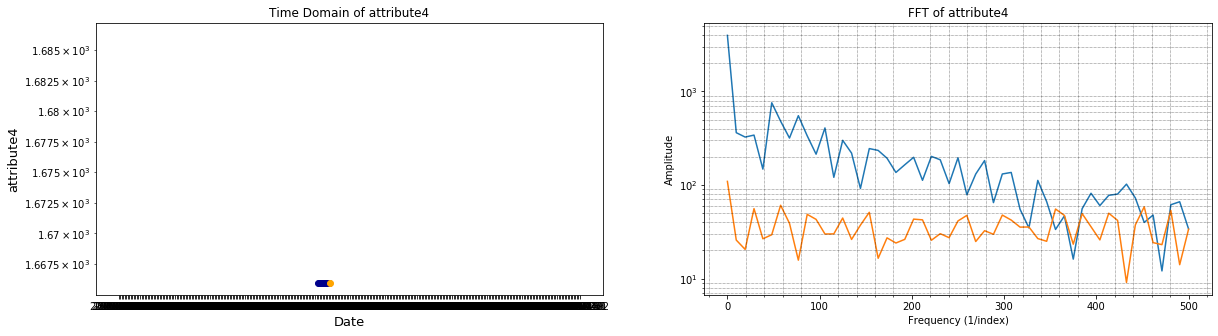

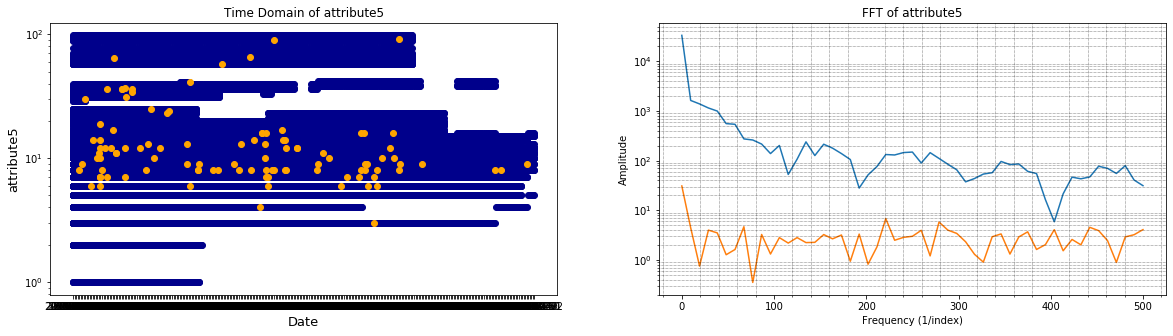

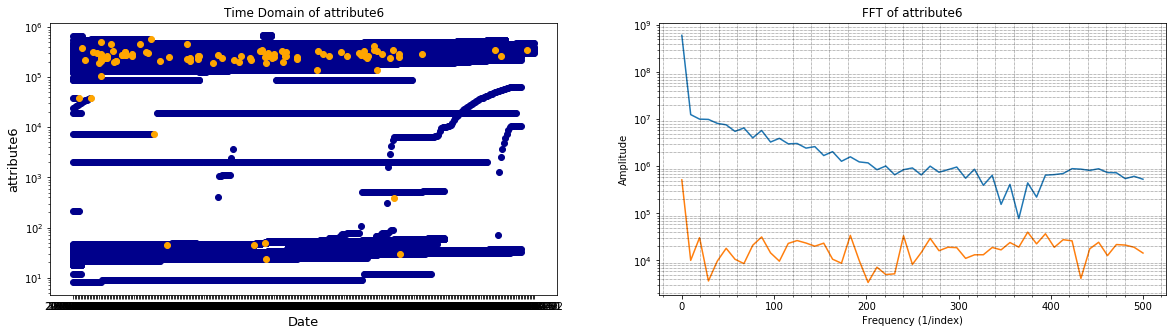

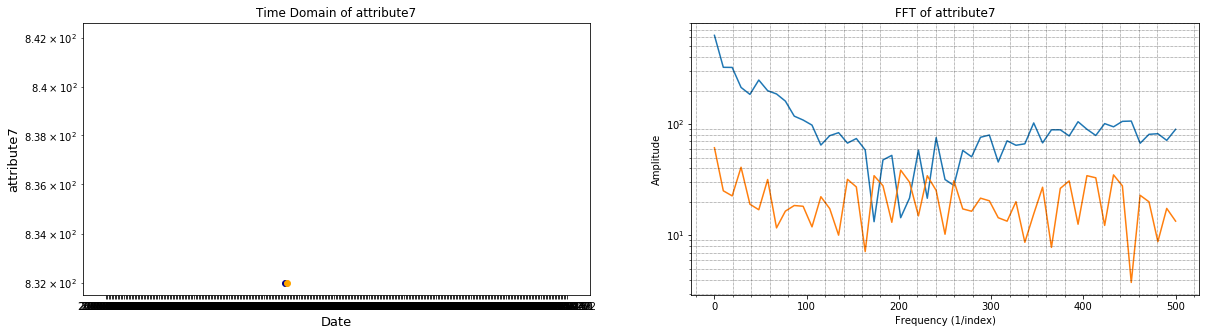

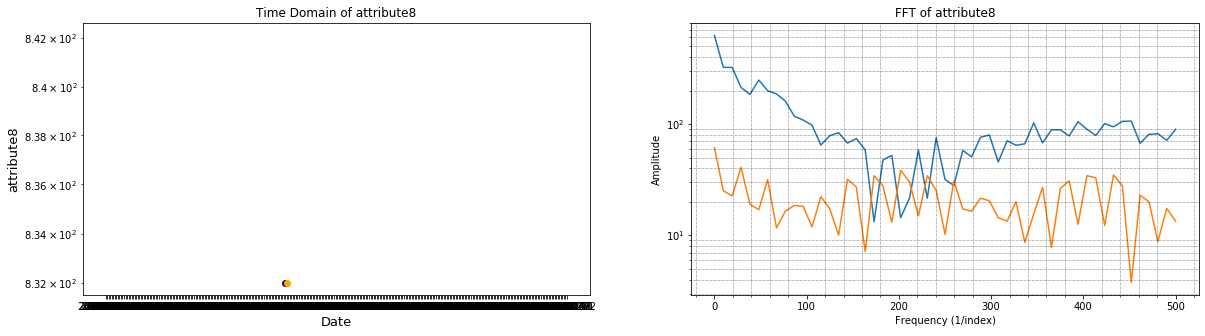

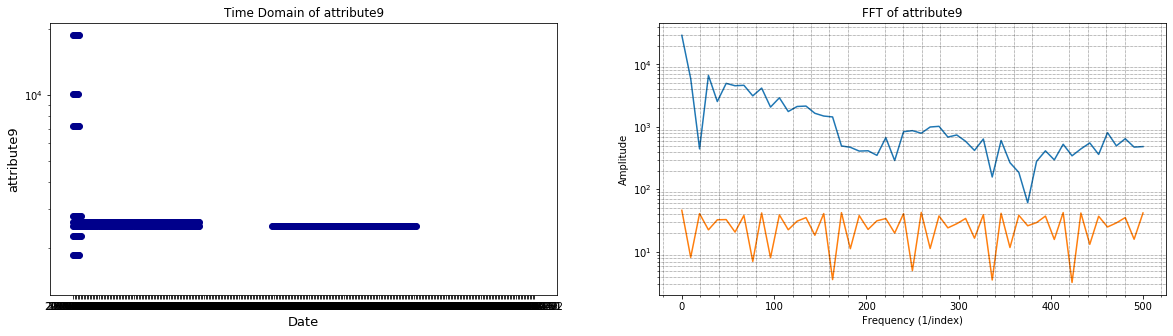

In [18]:
for elem in df:
    if(elem != 'date' and elem != 'device' and elem != 'failure'):
        plotfailureattrvstime(df, elem)

In [19]:
abs(df.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute6    0.000550
attribute3    0.000948
Name: failure, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [21]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [23]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [24]:
#df['date'] = pd.to_datetime(df['date']).map(dt.datetime.toordinal)

In [25]:
#df['date'] = df['date'] - df['date'].min()

In [26]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [27]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.toordinal())

In [28]:
df = df.groupby('device').last()
df.reset_index(inplace=True)

In [29]:
df.head()

,device,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,S1F01085,735604,0,128832128,56,0,52,6,409404,0,0,7
1,S1F013BB,735729,0,115676688,0,0,0,5,689161,0,0,0
2,S1F0166B,735604,0,7441792,0,3,0,6,404786,0,0,0
3,S1F01E6Y,735646,0,147350000,0,0,0,12,259491,0,0,0
4,S1F01JE0,735604,0,185424928,0,0,0,6,412151,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 12 columns):
device        1168 non-null object
date          1168 non-null int64
failure       1168 non-null int64
attribute1    1168 non-null int64
attribute2    1168 non-null int64
attribute3    1168 non-null int64
attribute4    1168 non-null int64
attribute5    1168 non-null int64
attribute6    1168 non-null int64
attribute7    1168 non-null int64
attribute8    1168 non-null int64
attribute9    1168 non-null int64
dtypes: int64(11), object(1)
memory usage: 109.6+ KB


In [32]:
df1 = df.select_dtypes(exclude=['object'])
df2 = df.select_dtypes(include=['object'])

303

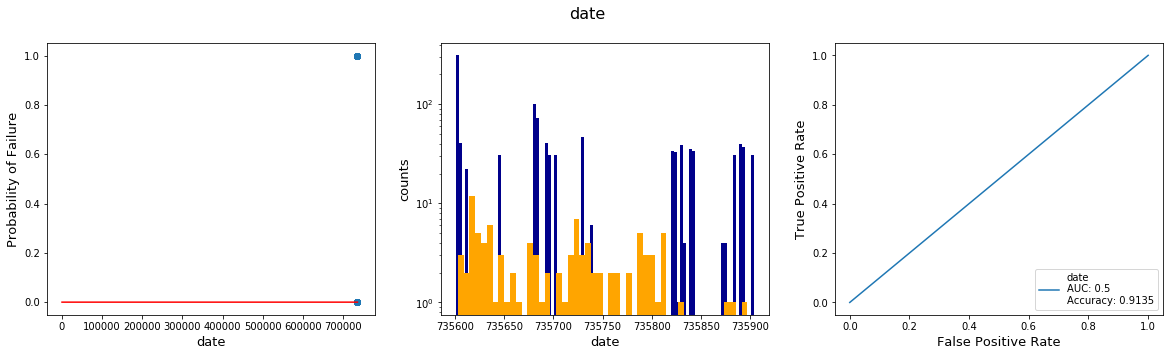

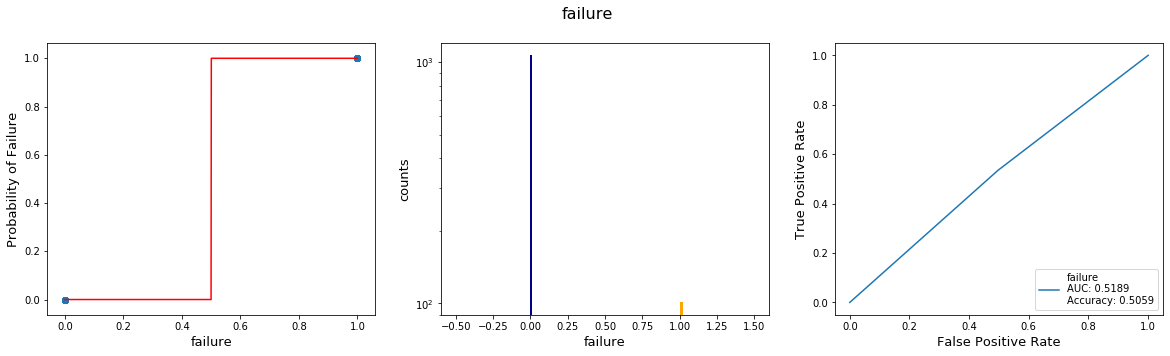

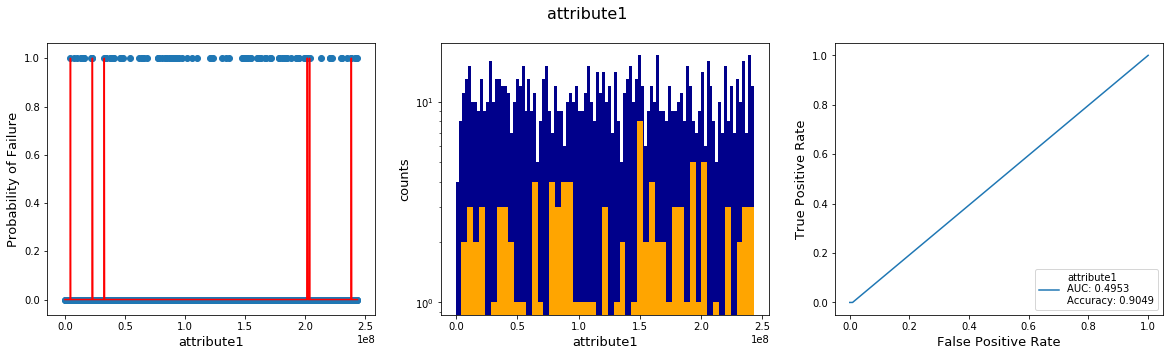

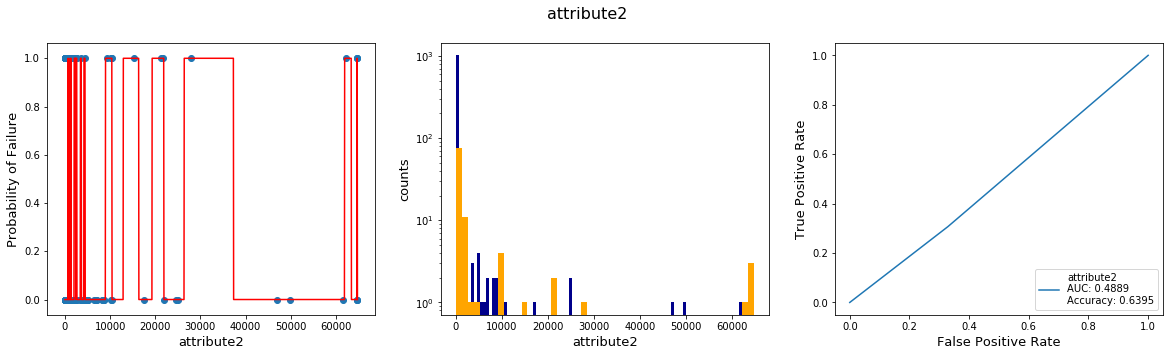

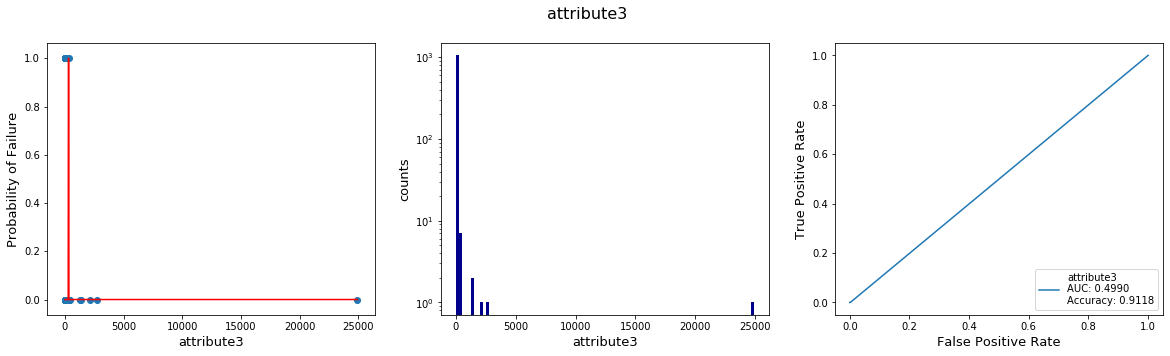

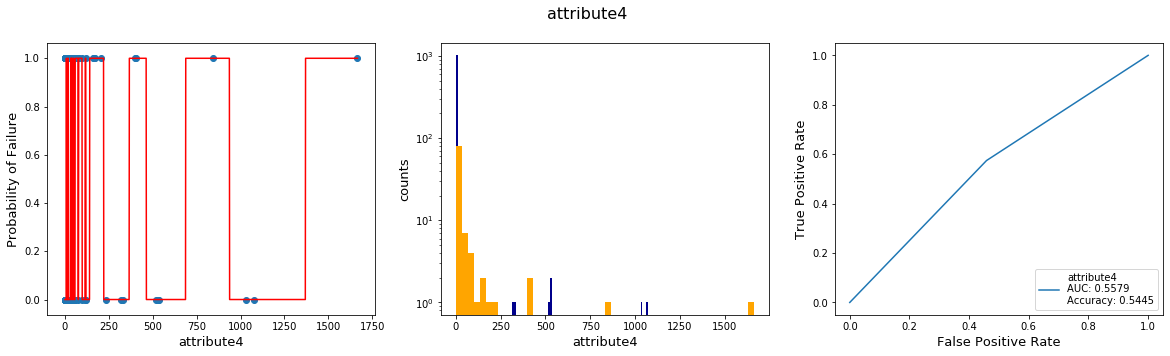

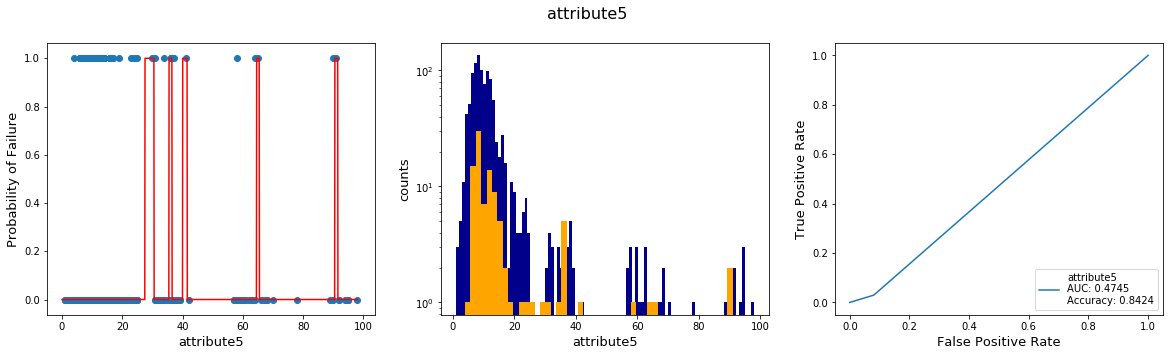

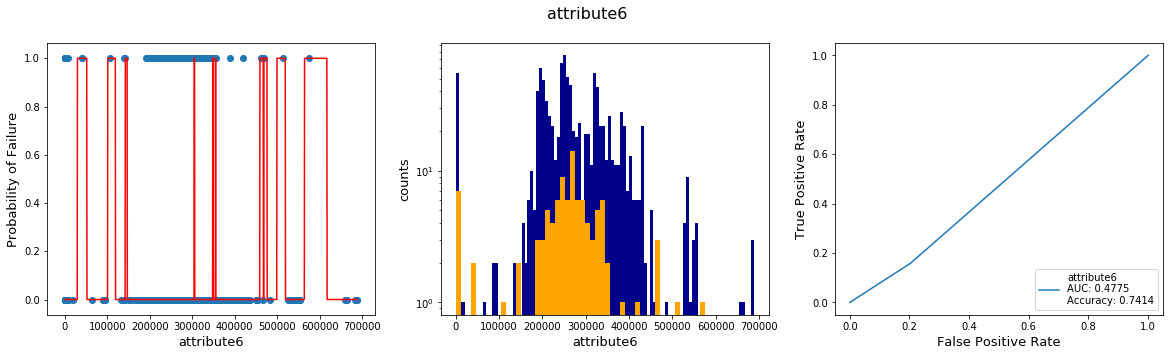

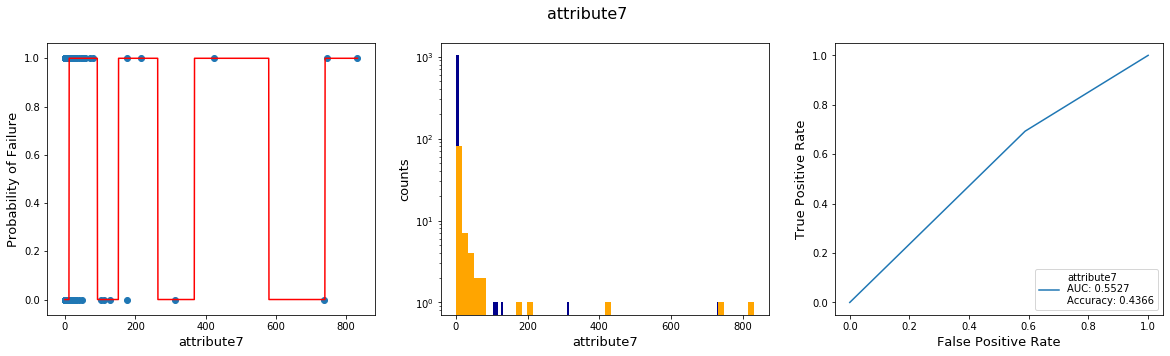

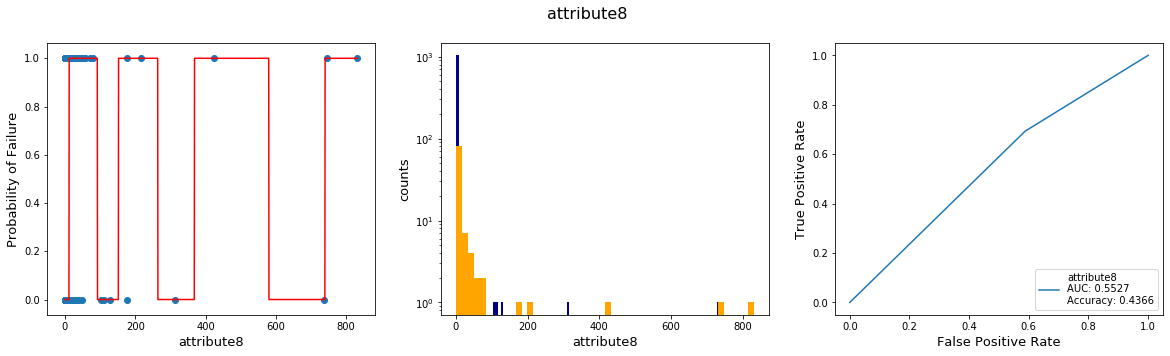

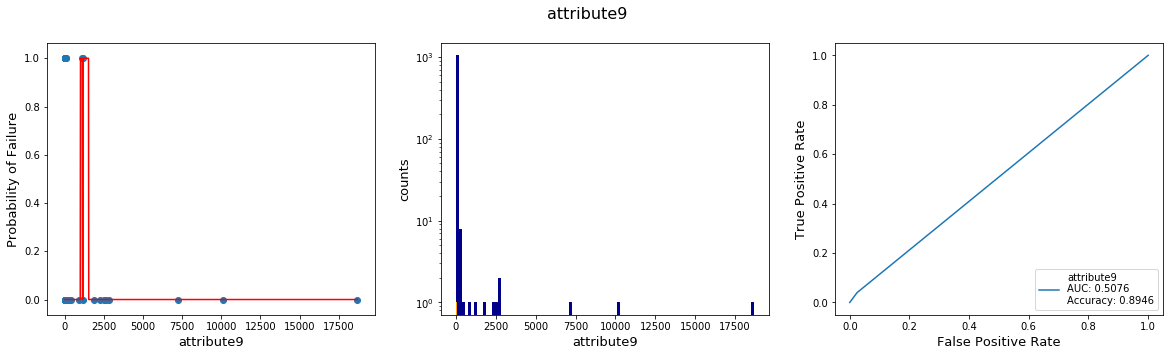

In [33]:
for elem in df1:
    GenerateClassPlot(df1, elem, 'failure', GradientBoostingClassifier())

### Attribute3

In [38]:
cutoff_vals = np.linspace(1, 100, 100)
[{len(df[df['failure']==1][df['attribute3']<elem])/len(df[df['failure']==0][df['attribute3']<elem]), elem} for elem in cutoff_vals]

[{0.09276248725790011, 1.0},
 {0.09542743538767395, 2.0},
 {0.09683794466403162, 3.0},
 {0.09645669291338582, 4.0},
 {0.0962671905697446, 5.0},
 {0.09598432908912831, 6.0},
 {0.09598432908912831, 7.0},
 {0.0958904109589041, 8.0},
 {0.0966796875, 9.0},
 {0.09639727361246349, 10.0},
 {0.0963035019455253, 11.0},
 {0.09602327837051407, 12.0},
 {0.09583736689254599, 13.0},
 {0.09583736689254599, 14.0},
 {0.09565217391304348, 15.0},
 {0.09555984555984556, 16.0},
 {0.09546769527483125, 17.0},
 {0.09546769527483125, 18.0},
 {0.0953757225433526, 19.0},
 {0.0953757225433526, 20.0},
 {0.0953757225433526, 21.0},
 {0.09510086455331412, 22.0},
 {0.09510086455331412, 23.0},
 {0.09510086455331412, 24.0},
 {0.09510086455331412, 25.0},
 {0.09500959692898273, 26.0},
 {0.09500959692898273, 27.0},
 {0.09500959692898273, 28.0},
 {0.09500959692898273, 29.0},
 {0.09500959692898273, 30.0},
 {0.09500959692898273, 31.0},
 {0.09500959692898273, 32.0},
 {0.09500959692898273, 33.0},
 {0.09500959692898273, 34.0},
 {

In [39]:
dfmod, trainsize = cutoffgreater(df, 'attribute3', 17)

In [40]:
dfmod[dfmod['failure'] == 1].shape

(99, 12)

In [41]:
dfmod[dfmod['failure'] == 0].shape

(1037, 12)

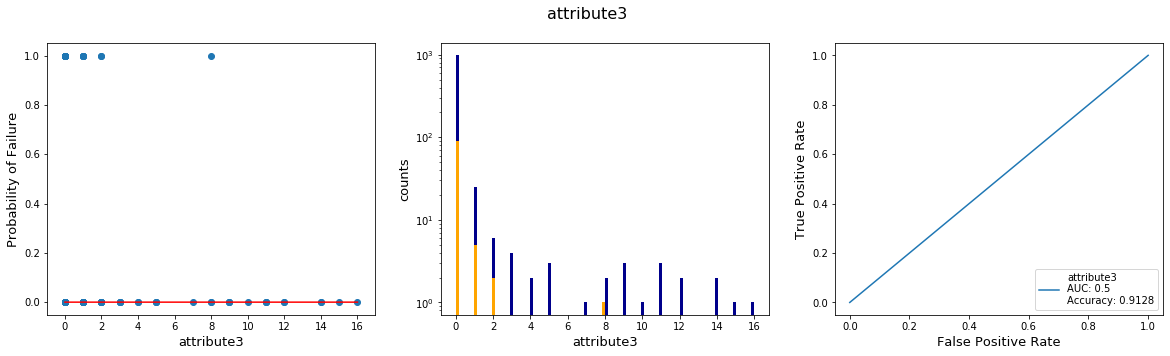

In [42]:
GenerateClassPlot(dfmod, 'attribute3', 'failure', GradientBoostingClassifier())

###  Attribute 9

In [43]:
cutoff_vals = np.linspace(1, 100, 100)
[{len(df[df['failure']==1][df['attribute9']<elem])/len(df[df['failure']==0][df['attribute9']<elem]), elem} for elem in cutoff_vals]

[{0.09137055837563451, 1.0},
 {0.08853575482406356, 2.0},
 {0.0916030534351145, 3.0},
 {0.09341825902335456, 4.0},
 {0.09109730848861283, 5.0},
 {0.09304703476482618, 6.0},
 {0.09219858156028368, 7.0},
 {0.09356136820925554, 8.0},
 {0.09272183449651047, 9.0},
 {0.09343936381709742, 10.0},
 {0.09405940594059406, 11.0},
 {0.09495548961424333, 12.0},
 {0.0947680157946693, 13.0},
 {0.09448818897637795, 14.0},
 {0.09430255402750491, 15.0},
 {0.09421000981354269, 16.0},
 {0.09421000981354269, 17.0},
 {0.09421000981354269, 18.0},
 {0.0940254652301665, 19.0},
 {0.09500489715964741, 20.0},
 {0.0949119373776908, 21.0},
 {0.0947265625, 22.0},
 {0.0947265625, 23.0},
 {0.09463414634146342, 24.0},
 {0.09444985394352483, 25.0},
 {0.0943579766536965, 26.0},
 {0.09426627793974733, 27.0},
 {0.09426627793974733, 28.0},
 {0.09426627793974733, 29.0},
 {0.09426627793974733, 30.0},
 {0.0941747572815534, 31.0},
 {0.0941747572815534, 32.0},
 {0.0941747572815534, 33.0},
 {0.0939922480620155, 34.0},
 {0.09381044

In [50]:
dfmod, trainsize = cutoffgreater(dfmod, 'attribute9', 43)

In [51]:
dfmod[dfmod['failure'] == 1].shape

(97, 12)

In [52]:
dfmod[dfmod['failure'] == 0].shape

(1019, 12)

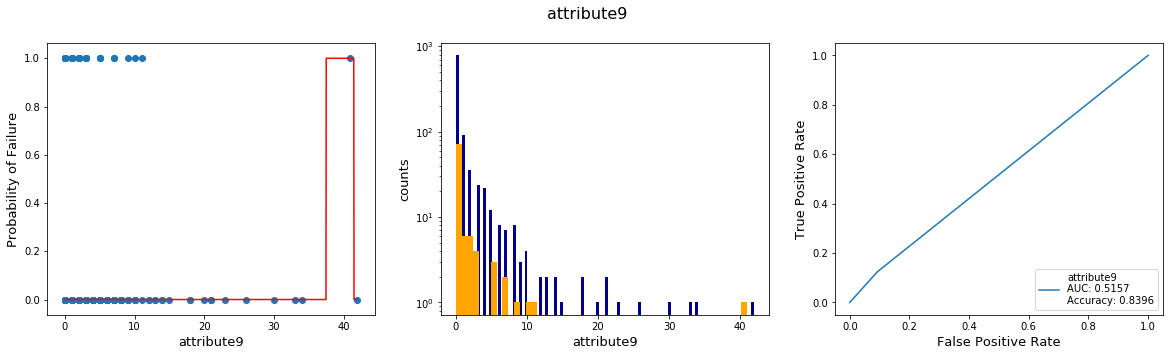

In [53]:
GenerateClassPlot(dfmod, 'attribute9', 'failure', GradientBoostingClassifier())

### Attribute 5

In [54]:
dfmod['attribute5'] = dfmod['attribute5'].apply(lambda x: np.log(x+1))

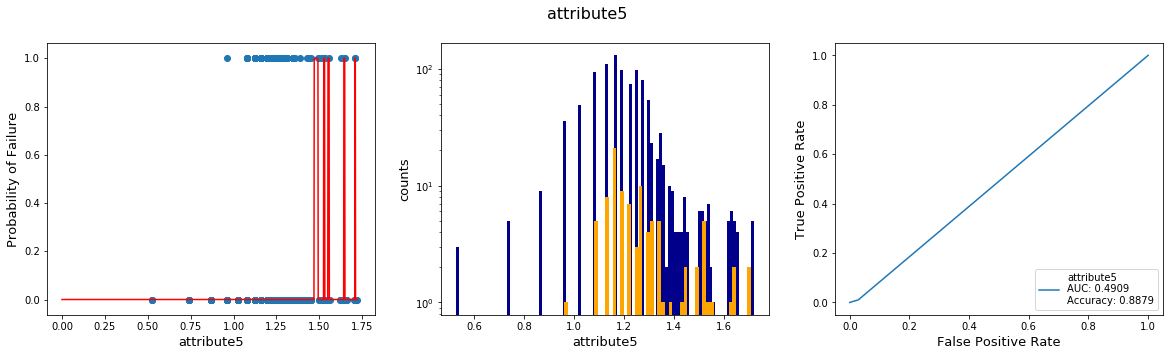

In [55]:
GenerateClassPlot(dfmod, 'attribute5', 'failure', GradientBoostingClassifier())

In [ ]:
dfmod2, trainsize = cutofflesser(dfmod, 'attribute5', 1.5)

In [ ]:
dfmod2['attribute5'] = dfmod2['attribute5'].apply(lambda x:np.log(x))

In [ ]:
GenerateClassPlot(dfmod2, 'attribute5', 'failure', GradientBoostingClassifier())

In [84]:
df.drop('device',axis=1, inplace = True)

### Random Undersampling

In [85]:
count_class_0, count_class_1 = df.failure.value_counts()

In [86]:
df_class_0 = df[df['failure'] == 0]
df_class_1 = df[df['failure'] == 1]

In [87]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

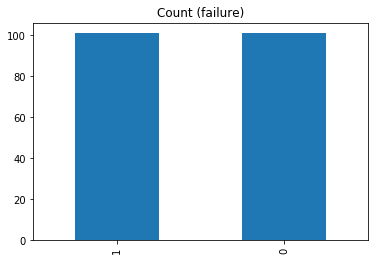

In [88]:
df_under.failure.value_counts().plot(kind='bar', title='Count (failure)');

### Random Oversampling

In [89]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

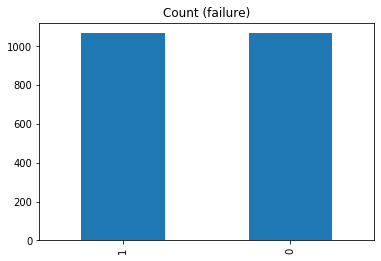

In [90]:
df_over.failure.value_counts().plot(kind='bar', title='Count (failure)');

In [91]:
abs(df_under.corr()['failure']).sort_values(ascending = False)

failure       1.000000
attribute5    0.235008
attribute4    0.177557
attribute2    0.165273
attribute8    0.162385
attribute7    0.162385
attribute6    0.154139
attribute1    0.073560
attribute9    0.069070
date          0.007719
attribute3    0.000426
Name: failure, dtype: float64

In [92]:
abs(df_over.corr()['failure']).sort_values(ascending = False)

failure       1.000000
attribute2    0.183276
attribute4    0.169546
attribute8    0.158234
attribute7    0.158234
attribute5    0.139208
attribute6    0.073629
date          0.062532
attribute9    0.028836
attribute3    0.027764
attribute1    0.022856
Name: failure, dtype: float64

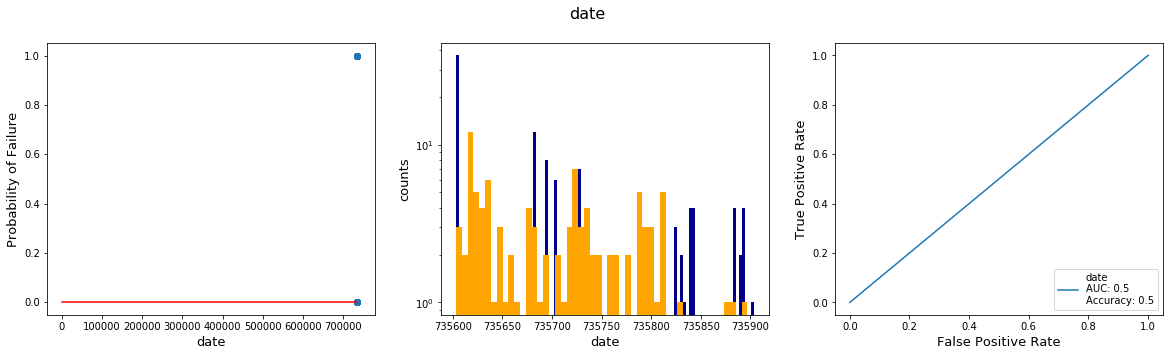

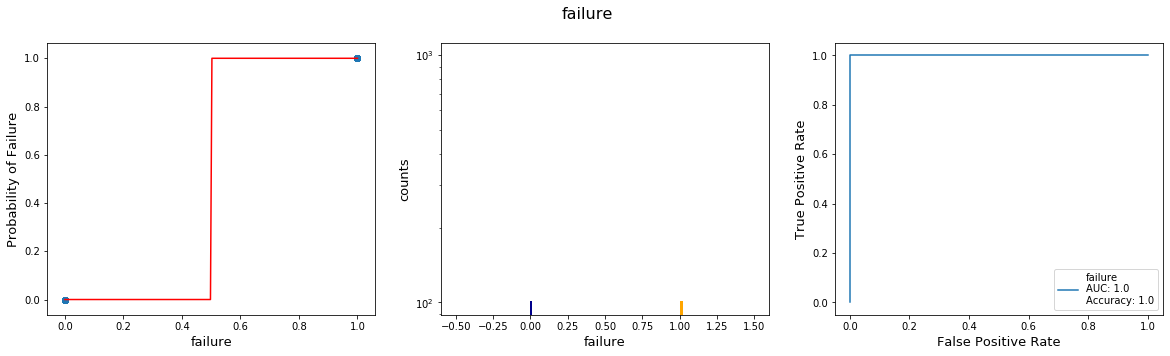

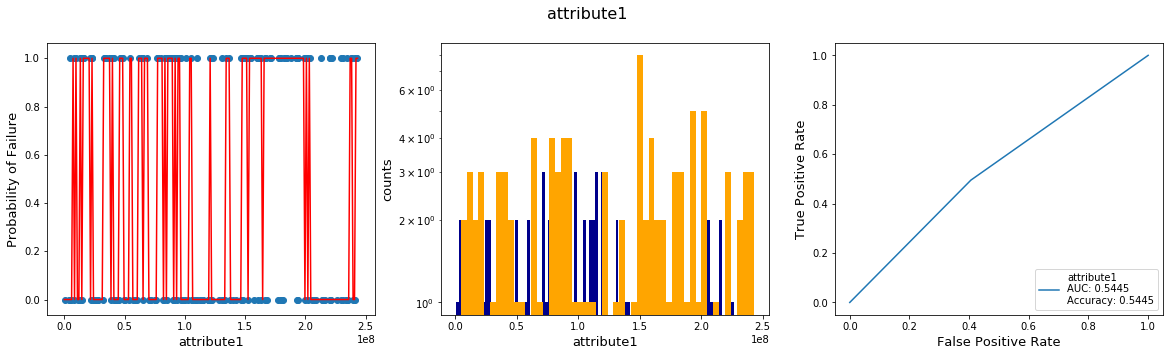

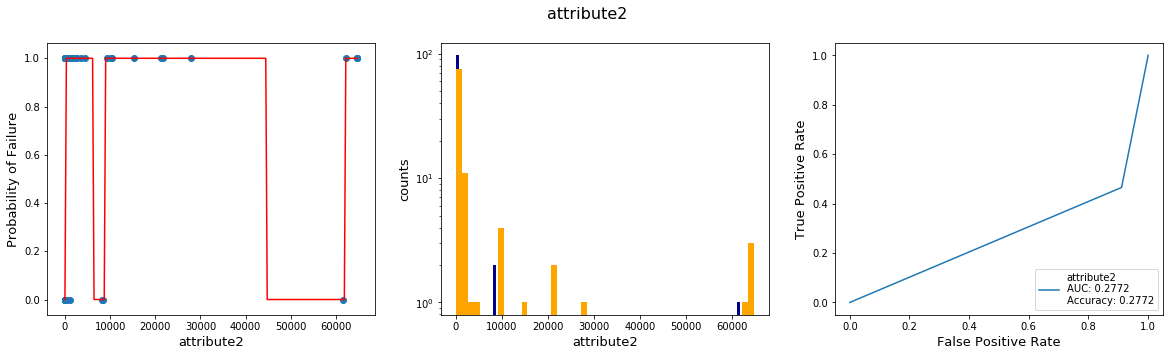

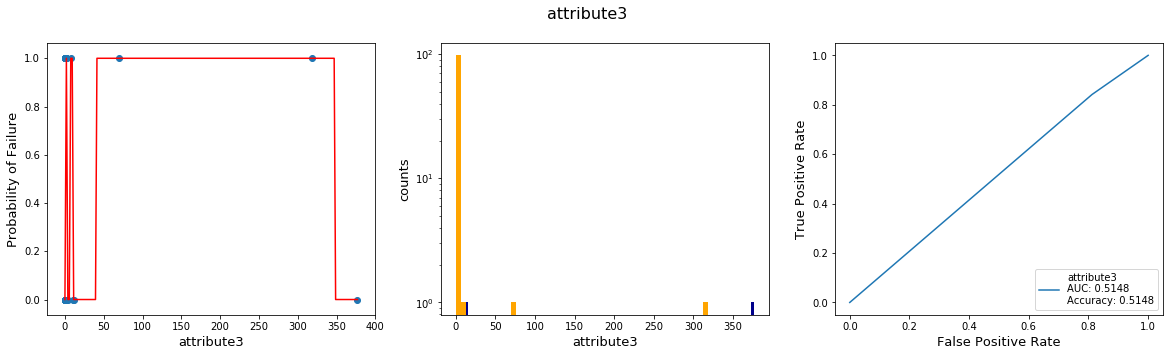

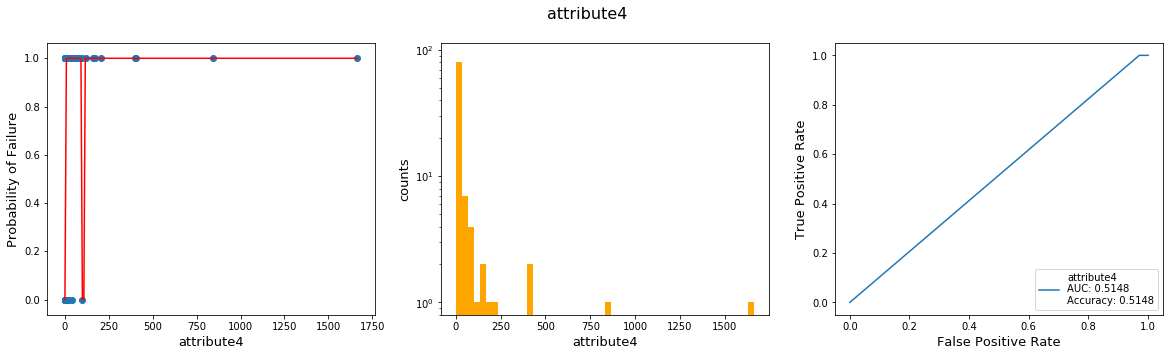

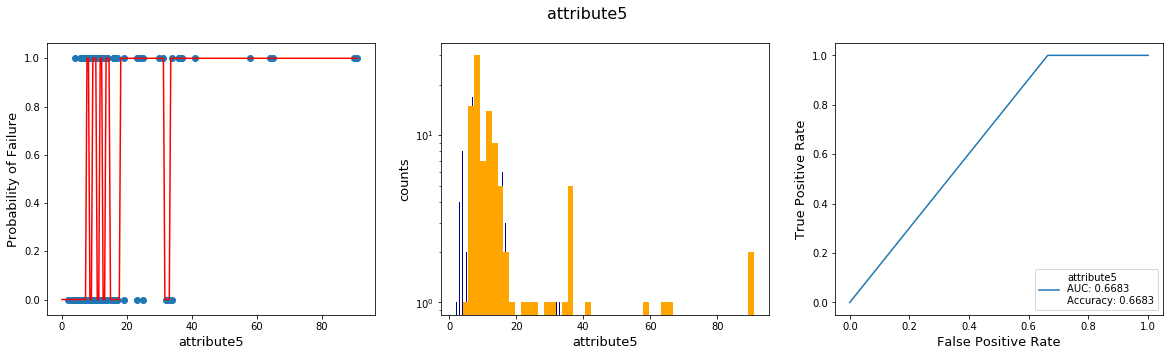

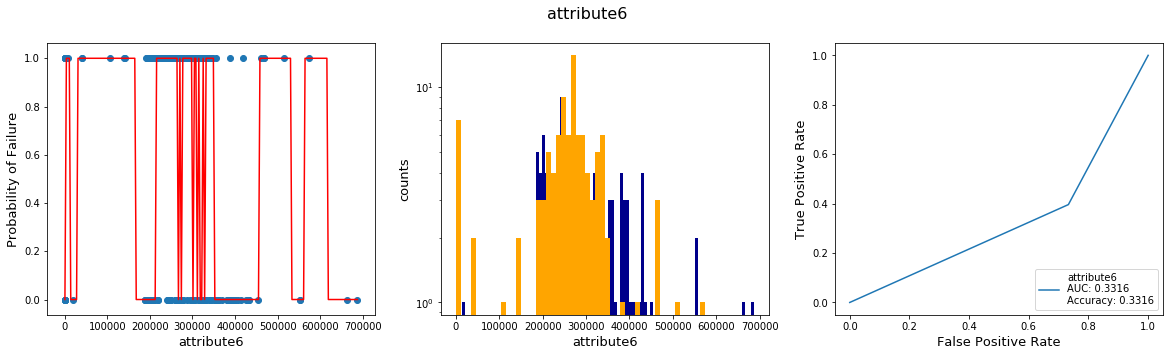

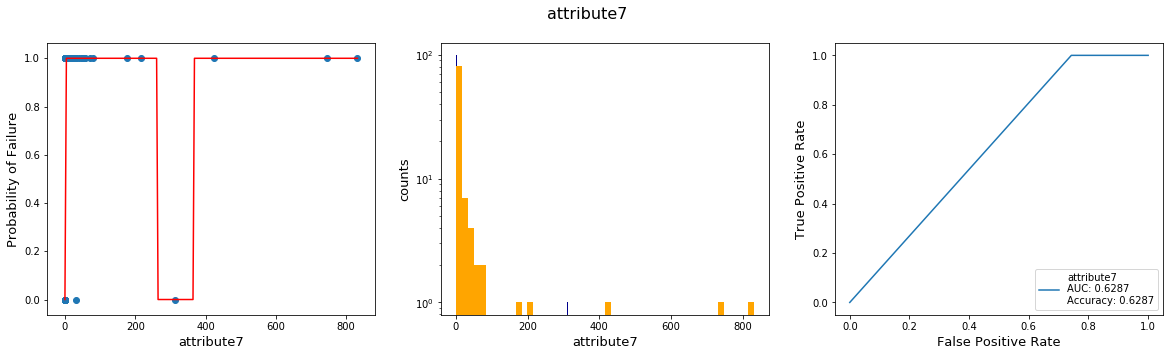

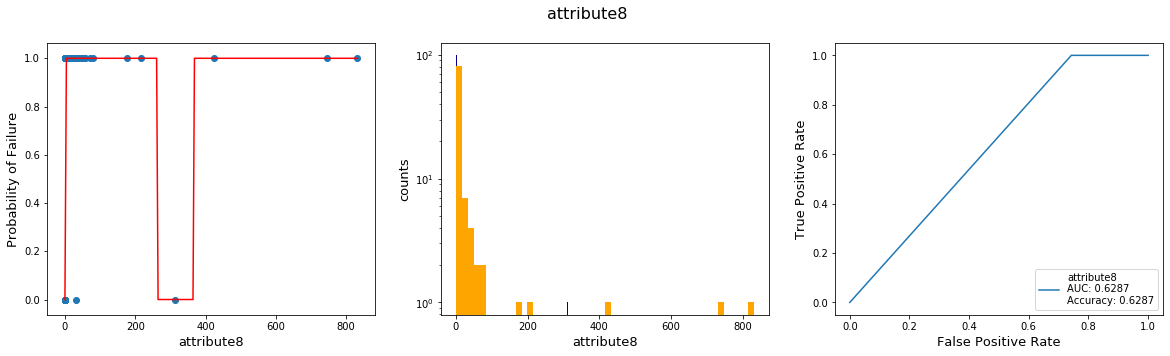

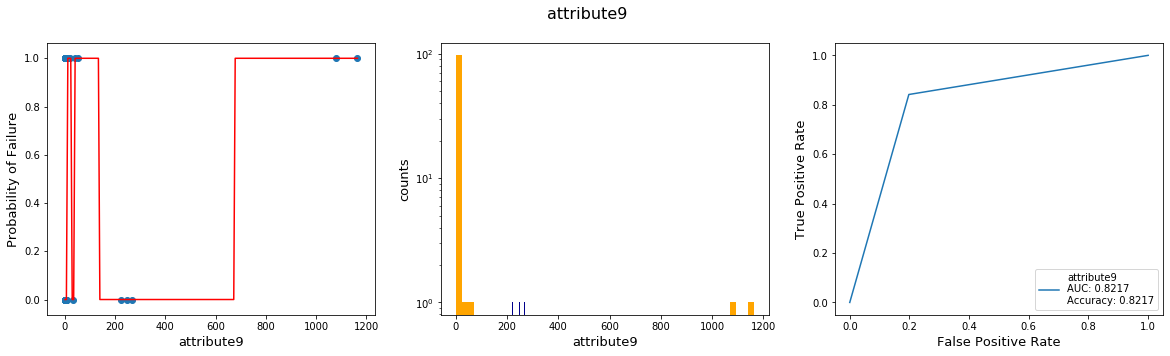

In [93]:
for elem in df_under:
    GenerateClassPlot(df_under, elem, 'failure', GradientBoostingClassifier())

In [96]:
#df_under.drop(['attribute6', 'attribute4', 'attribute3', 'attribute2'], axis=1, inplace=True)

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [98]:
def GenAUCCurve(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true,  y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.plot(fpr,tpr)
    plt.legend(["\nAUC: "+str(auc)[:6] + "\nAccuracy: "+str(accuracy)[:6]], loc='best')
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.show()
    

In [114]:
def OptimalRegression(XData, y):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    log = LogisticRegression()
    gbc = GradientBoostingClassifier()
    d = DecisionTreeClassifier()
    r = RandomForestClassifier()
    
    algorithms = [g,b,k,log,d,r,gbc]
    names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic','Single Tree','Random Forest', 'GradientBoost']

    x_train, x_test, y_train, y_test = train_test_split(XData, y, train_size=0.8, random_state=0)
    
    # fit the data
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    largest_f1 = 0
    bestmodel = 0
        
    for algo in algorithms:
        algo.fit(x_train,y_train)
        y_pred = algo.predict(x_test)
        
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1_val = f1_score(y_test, y_pred)
        f1.append(f1_val)
        if(f1_val < .95) and (f1_val > largest_f1):
            largest_f1 = f1_val
            bestmodel = algo
        
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
     
    stats = metrics.sort_values('F1', ascending = False)
    
    bestmodel.fit(x_train,y_train)
    y_pred = algo.predict(x_test)
    
    GenAUCCurve(y_test, y_pred)
    print(largest_f1)
    
    return bestmodel, stats


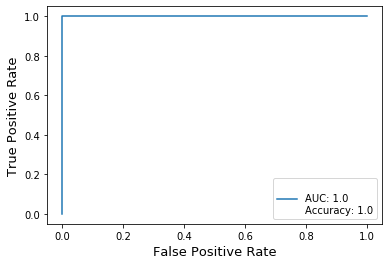

0.5882352941176471


,Accuracy,Precision,Recall,F1
BernoulliNB,1.000000,1.000000,1.000000,1.000000
Single Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000
GradientBoost,1.000000,1.000000,1.000000,1.000000
K Nearest,0.487805,0.535714,0.652174,0.588235
GaussianNB,0.512195,0.666667,0.260870,0.375000
Logistic,0.439024,0.500000,0.130435,0.206897


In [115]:
model, stats = OptimalRegression(df_under, df_under['failure'])
stats

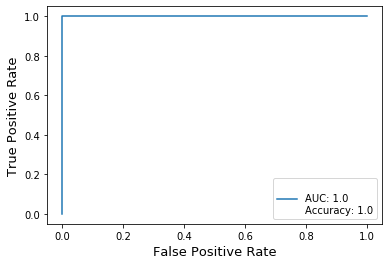

0.8577586206896551


,Accuracy,Precision,Recall,F1
Single Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000
GradientBoost,1.000000,1.000000,1.000000,1.000000
BernoulliNB,0.988290,0.975962,1.000000,0.987835
K Nearest,0.845433,0.762452,0.980296,0.857759
Logistic,0.585480,0.606557,0.364532,0.455385
GaussianNB,0.564403,0.869565,0.098522,0.176991


In [116]:
model, stats = OptimalRegression(df_over, df_over['failure'])
stats